# Classification according to Crema <sup>1</sup>

Only the classification stage is considered here. Distinction between exercise and non-exercise as well as counting of repetitions is not part of this section.


<sup>1</sup> "Characterization of a Wearable System for Automatic Supervision of Fitness Exercises"

In [1]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import functionsMasterProjectMeinhart as fmpm
import functionsFeaturesCrema as ffc

## Signal files

### Get all csv-files with signal data

In [2]:
# folder with csv-files
file_dir = 'E:\Physio_Data_Split_Ex_and_NonEx'

# get all file names of desired folder
signal_all_files = []
for (dirpath, dirnames, filenames) in os.walk(file_dir):
    signal_all_files.extend(filenames)
    break
print('Total number of files: {}'.format(len(signal_all_files)))
signal_all_files

Total number of files: 549


['subject01_00_nonEx.csv',
 'subject01_01_nonEx.csv',
 'subject01_02_nonEx.csv',
 'subject01_03_nonEx.csv',
 'subject01_04_nonEx.csv',
 'subject01_05_nonEx.csv',
 'subject01_06_nonEx.csv',
 'subject01_07_nonEx.csv',
 'subject01_08_nonEx.csv',
 'subject01_09_nonEx.csv',
 'subject01_10_nonEx.csv',
 'subject01_11_nonEx.csv',
 'subject01_12_nonEx.csv',
 'subject01_13_nonEx.csv',
 'subject01_14_nonEx.csv',
 'subject01_15_nonEx.csv',
 'subject01_16_nonEx.csv',
 'subject01_17_nonEx.csv',
 'subject01_18_nonEx.csv',
 'subject01_19_nonEx.csv',
 'subject01_20_nonEx.csv',
 'subject01_21_nonEx.csv',
 'subject01_22_nonEx.csv',
 'subject01_23_nonEx.csv',
 'subject01_24_nonEx.csv',
 'subject01_25_nonEx.csv',
 'subject01_26_nonEx.csv',
 'subject01_27_nonEx.csv',
 'subject01_28_nonEx.csv',
 'subject01_29_nonEx.csv',
 'subject01_30_nonEx.csv',
 'subject01_BC_05.csv',
 'subject01_BC_10.csv',
 'subject01_BC_15.csv',
 'subject01_LR_05.csv',
 'subject01_LR_10.csv',
 'subject01_LR_15.csv',
 'subject01_MP_05.c

### Remove files with non-exercise data

In [3]:
signal_files = [file for file in signal_all_files if 'nonEx' not in file]
print('Number of exercise files: {}'.format(len(signal_files)))
signal_files

Number of exercise files: 270


['subject01_BC_05.csv',
 'subject01_BC_10.csv',
 'subject01_BC_15.csv',
 'subject01_LR_05.csv',
 'subject01_LR_10.csv',
 'subject01_LR_15.csv',
 'subject01_MP_05.csv',
 'subject01_MP_10.csv',
 'subject01_MP_15.csv',
 'subject01_P1_05.csv',
 'subject01_P1_10.csv',
 'subject01_P1_15.csv',
 'subject01_P2_05.csv',
 'subject01_P2_10.csv',
 'subject01_P2_15.csv',
 'subject01_RF_05.csv',
 'subject01_RF_10.csv',
 'subject01_RF_15.csv',
 'subject01_RO_05.csv',
 'subject01_RO_10.csv',
 'subject01_RO_15.csv',
 'subject01_RS_05.csv',
 'subject01_RS_10.csv',
 'subject01_RS_15.csv',
 'subject01_SA_05.csv',
 'subject01_SA_10.csv',
 'subject01_SA_15.csv',
 'subject01_TC_05.csv',
 'subject01_TC_10.csv',
 'subject01_TC_15.csv',
 'subject02_BC_05.csv',
 'subject02_BC_10.csv',
 'subject02_BC_15.csv',
 'subject02_LR_05.csv',
 'subject02_LR_10.csv',
 'subject02_LR_15.csv',
 'subject02_MP_05.csv',
 'subject02_MP_10.csv',
 'subject02_MP_15.csv',
 'subject02_P1_05.csv',
 'subject02_P1_10.csv',
 'subject02_P1_1

## Feature generation

### Function to write features to csv-file

In [4]:
def write_crema_features_to_csv(feature_csv_file, features=None, label='non'):
    '''
    Function to add 24 features (according to Crema) to csv-file.
    If no features are provided (features=None) a new csv-file
    is generated with the header for the features.
    (--> label;aX_ampFreqDist_01_05;aX_rms_06;aX_mean_07;...)
    
    Parameters
    ----------
    feature_csv_file : string
        File to save the features.
        
    features : dict
        Dictionary with the following keys for the 24 features:
                 'aX_ampFreqDist_01_05',
                 'aX_rms_06',
                 'aX_mean_07',
                 'aX_std_08',
                 'aX_powerbands_09_18',
                 'aX_maxValAutocorr_19',
                 'aX_numPromPeaks_20',
                 'aX_numWeakPeaks_21',
                 'aX_valFirstPeak_22',
                 'aX_kurtosis_23',
                 'aX_intQuatRange_24',

        same for 'aYZPC1_ampFreqDist_01_05'
                 ...
                 
        and for  'gPC1_ampFreqDist_01_05'
                 ...
   
    label: string
        Abbreviation of the exercise (e.g. 'RF').
        default: 'non'
    
    Returns
    -------
    no returns
    '''
    
    # names of features
    feature_name_list = ['_ampFreqDist_01',
                         '_ampFreqDist_02',
                         '_ampFreqDist_03',
                         '_ampFreqDist_04',
                         '_ampFreqDist_05',
                         '_rms_06',
                         '_mean_07',
                         '_std_08',
                         '_powerbands_09',
                         '_powerbands_10',
                         '_powerbands_11',
                         '_powerbands_12',
                         '_powerbands_13',
                         '_powerbands_14',
                         '_powerbands_15',
                         '_powerbands_16',
                         '_powerbands_17',
                         '_powerbands_18',
                         '_maxValAutocorr_19',
                         '_numPromPeaks_20',
                         '_numWeakPeaks_21',
                         '_valFirstPeak_22',
                         '_kurtosis_23',
                         '_intQuatRange_24']
    
    # putting the header of the feature-file together if features is None
    if features is None:
        # first column contains labels
        header_string = 'label;'
        
        for sig in ['ax','aYZPC1','gPC1']:
            for feature_name in feature_name_list:
                header_string +=  sig + feature_name + ';'
        
        # remove last separator (;)
        idx_last_sep = header_string.rfind(";")
        header_string =  header_string[:idx_last_sep]
        
        # write header to file
        with open(feature_csv_file, 'w') as feature_file:
            feature_file.writelines(header_string + '\n')
        
        return
    
    # string to write features to csv-file
    feature_string = label + ';' # first column contains labels
    
    # putting the feature string together
    for sig in ['aX','aYZPC1','gPC1']:
            
            ampFreqDist_flag = False # flag for the five ampFreqDist features --> check if already done
            powerband_flag = False # flag for the ten powerband features --> check if already done
            
            for feature_name in feature_name_list:
                
                # if ampFreqDist features --> consider list of features
                if 'ampFreqDist' in feature_name:
                    if ampFreqDist_flag is False:
                        ampFreqDist_flag = True
                        feature_string += ';'.join(map(str, features[sig+'_ampFreqDist_01_05'])) + ';'
                
                # if powerband features --> consider list of features
                elif 'powerbands' in feature_name:
                    if powerband_flag is False:
                        powerband_flag = True
                        feature_string += ';'.join(map(str, features[sig+'_powerbands_09_18'])) + ';'
                    
                else:
                    feature_string +=  str(features[sig+feature_name]) + ';'
    
    # remove last separator (;)
    idx_last_sep = feature_string.rfind(";")
    feature_string =feature_string[:idx_last_sep]
    
    # append features to file
    with open(feature_csv_file, 'a') as feature_file:
        feature_file.writelines(feature_string + '\n')
    
    

### Windowing all files with a window of 5 s and an increment of 0.2 s

In [5]:
# define csv-file to save the features and corresponding directory
feature_save_dir = 'E:\Physio_Features_Crema'
feature_save_file = 'features_all_subjects_5s_200ms.csv'
feature_save_path = os.path.join(feature_save_dir, feature_save_file)

# sampling rate of the signals
sampling_rate = 256

# window length
win_len = 5 # [s]

# window position increment
win_pos_inc = 0.2 # [s]

# parameters for the function fmpm.print_progress()
count = 0
max_count = len(signal_files)-1
prev_progress = 0 # previous progress

***Execute the cell below only if feature file does not already exist (takes ~20 min) $\rightarrow$ cell is freezed***

In [ ]:
# Generating the csv-file with the header
write_crema_features_to_csv(feature_save_path, features=None)

# going through all signal files
for current_file in signal_files:

    # path to current csv-file with signals
    signal_path = os.path.join(file_dir, current_file)

    # load all signal data from current file
    signals = fmpm.get_sensor_data(in_file=signal_path, sampling_rate=sampling_rate, signals=['Acc','Gyr'])
    
    # window position at 0 s in the beginnig
    win_pos = 0 # [s]

    while True:

        # select signals of current window
        signals_5s = ffc.select_window(signals, window_length=win_len, start_time=win_pos, sampling_rate=sampling_rate)

        # break the while loop if signals_5s is None --> window out of range
        if signals_5s is None:
            break

        # perform the dimension reduction of the signals in the selected window
        sig_dim_red_5s = ffc.signal_dim_reduc(signals_5s)

        # generate the features from the dimension reduced signals
        features = ffc.generate_features_Crema(sig_dim_red_5s)

        # use the file name as label (without '.csv')
        label = current_file.split('.')[0]

        # write generated features to csv-file
        write_crema_features_to_csv(feature_save_path, features=features, label=label)

        # increase the window position
        win_pos += win_pos_inc
    
    #print the progress
    prev_progress = fmpm.print_progress(count, max_count, prev_progress)
    count += 1

### Load the generated features

In [6]:
feature_data = pd.read_csv(feature_save_path, sep=';')
feature_data

,label,ax_ampFreqDist_01,ax_ampFreqDist_02,ax_ampFreqDist_03,ax_ampFreqDist_04,ax_ampFreqDist_05,ax_rms_06,ax_mean_07,ax_std_08,ax_powerbands_09,...,gPC1_powerbands_15,gPC1_powerbands_16,gPC1_powerbands_17,gPC1_powerbands_18,gPC1_maxValAutocorr_19,gPC1_numPromPeaks_20,gPC1_numWeakPeaks_21,gPC1_valFirstPeak_22,gPC1_kurtosis_23,gPC1_intQuatRange_24
0,subject01_BC_05,735,98,86,109,252,0.781195,-0.386669,0.678788,0.448270,...,0.248698,0.187060,0.114195,0.133722,1.564197e+07,1,0,5.677439e+06,-0.787818,159.182897
1,subject01_BC_05,684,98,86,110,302,0.774145,-0.324157,0.703009,0.483977,...,0.897272,0.723032,0.509787,0.429185,1.636813e+07,1,0,6.480917e+06,-0.923616,174.855254
2,subject01_BC_05,633,98,102,145,302,0.753763,-0.278716,0.700339,0.486481,...,1.782705,1.430826,1.007991,0.979056,1.789732e+07,1,0,7.681185e+06,-1.047846,185.516748
3,subject01_BC_05,584,127,122,145,302,0.733196,-0.254604,0.687571,0.471533,...,2.582355,2.178054,1.520687,1.318051,1.964916e+07,1,0,9.177501e+06,-1.209414,223.483180
4,subject01_BC_05,583,128,122,145,302,0.724777,-0.247308,0.681279,0.463399,...,1.668959,1.260825,0.938013,0.822285,2.080066e+07,1,0,1.016137e+07,-1.345619,250.921059
5,subject01_BC_05,591,123,123,142,301,0.724313,-0.246951,0.680914,0.462918,...,0.310056,0.309890,0.189937,0.163268,2.142876e+07,1,0,1.055472e+07,-1.424096,250.943892
6,subject01_BC_05,591,123,123,142,301,0.724196,-0.246859,0.680823,0.462781,...,0.034838,0.014833,0.010470,0.006427,2.147039e+07,1,0,1.056765e+07,-1.430062,250.948389
7,subject01_BC_05,591,123,123,142,301,0.725181,-0.247631,0.681591,0.463839,...,0.064066,0.045407,0.031422,0.026504,2.139034e+07,1,0,1.034049e+07,-1.421949,250.933471
8,subject01_BC_05,591,123,123,142,301,0.726586,-0.248883,0.682631,0.465292,...,0.229462,0.167779,0.119116,0.112185,2.078664e+07,1,1,9.903861e+06,-1.420477,247.117479
9,subject01_BC_05,604,122,111,142,301,0.731554,-0.256373,0.685159,0.468270,...,0.065229,0.035210,0.028574,0.022295,2.000815e+07,1,1,9.549079e+06,-1.455245,247.057473


In [7]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36490 entries, 0 to 36489
Data columns (total 73 columns):
label                       36490 non-null object
ax_ampFreqDist_01           36490 non-null int64
ax_ampFreqDist_02           36490 non-null int64
ax_ampFreqDist_03           36490 non-null int64
ax_ampFreqDist_04           36490 non-null int64
ax_ampFreqDist_05           36490 non-null int64
ax_rms_06                   36490 non-null float64
ax_mean_07                  36490 non-null float64
ax_std_08                   36490 non-null float64
ax_powerbands_09            36490 non-null float64
ax_powerbands_10            36490 non-null float64
ax_powerbands_11            36490 non-null float64
ax_powerbands_12            36490 non-null float64
ax_powerbands_13            36490 non-null float64
ax_powerbands_14            36490 non-null float64
ax_powerbands_15            36490 non-null float64
ax_powerbands_16            36490 non-null float64
ax_powerbands_17            36490 n

### Feature selection for evaluation

Function to select a whole exercise repetition block of a subject, because at classification stage the block is considered as a whole.

In [8]:
def get_feature_matrix_block(feature_data, subject='subject01', exercise='RF', rep_block='05'):
    '''
    Function get the feature matrix of a whole exercise repetition block of a subject.
    One unique block is defined by the subject, the exercise and the number of repetitions.
    
    Parameters
    ----------
    feature_data : pandas df
        First column must contain labels, other columns contain features.
        
    subject : string
        Subject, which shall be selected.
        
    exercise : string
        Exercise, which shall be selected.
        
    rep_block : string
        Repetition block, which shall be selected.
    
    Returns
    -------
    numpy.ndarray
        Feature matrix --> size depends on feature_data.
    
    '''
    # string for the selected block
    block = subject + '_' + exercise + '_' + rep_block
    
    # select only data from a certain exercise block
    ind_block = [ii for ii, label in enumerate(feature_data.values[:,0]) if block in label]
    
    # return feature matrix
    return feature_data.values[ind_block,1:]

## ML model

In [9]:
# create random forest classifier model
ML_model = RandomForestClassifier(n_estimators=250, max_leaf_nodes=30, n_jobs=-1, random_state=42)

## Classification of exercise repetition blocks

***Function to display feature importances.***

In [10]:
def plot_feature_importances_decision_tree(model, feature_names, fig_size):
    '''
    Function to plot the feature importances of a decision tree model.
    
    Parameters
    ----------
    model : object
        Sklearn classifier model.
    
    feature_names : list
        List with feature names --> e.g. [*feature_data][1:]
        
    fig_size : tuple
        Size of the figure.
    
    Returns
    -------
    No returns.
    
    '''
    
    fig = plt.figure(figsize = fig_size)
    plt.barh(range(len(feature_names)), model.feature_importances_, align='center')
    plt.yticks(np.arange(len(feature_names)), feature_names, fontsize=12)
    plt.xlabel(r'feature importances $\rightarrow$ sum of all = 1', fontsize=15)
    plt.ylabel('feature', fontsize=15)
    plt.title('Importances of Features\nfor Classification with Decision Tree', fontsize=20)
    plt.gca().invert_yaxis() #  show first feature on top

***Function to evaluate a certain test subject, including training, classifying and printing the results.***

In [11]:
def evaluate_test_subject(feature_data, ML_model, test_subject='subject01', plot_feat_imp=False):
    '''
    Function to evaluate a certain test subject, including training, classifying and printing the results.
    
    Parameters
    ----------
    feature_data : pandas df
        First column must contain labels, other columns contain features.
        
    ML_model : sklearn ML model
        Model used for training and classification.
        
    test_subject : string
        Subject, which shall be evaluated.
        
    plot_feat_imp : boolean
        If true, plot the feature importances of the used model.
        Attention: Not possibel for each ML model.
    
    Returns
    -------
    No returns.
    
    '''

    # exercises to evaluate --> abbreviations
    ex_abbr = ['RF', 'RO', 'RS', 'LR', 'BC', 'TC', 'MP', 'SA', 'P1', 'P2']
    
    # repetition blocks to evaluate
    rep_block_nums = ['05', '10', '15']
    
    # exercise dictionary
    label_ex = {}
    for ii, ex in enumerate(ex_abbr):
        label_ex[ex] = ii
        
        
    #-----------------------------------------------------------------------------------------------------
    #                                      Training
    #-----------------------------------------------------------------------------------------------------
    
    # select only data from training subjects (not test subject) --> get line indices
    ind_train = [ii for ii, sub_ex in enumerate(feature_data.values[:,0]) if test_subject not in sub_ex]

    # get feature matrix for training
    X_train = feature_data.values[ind_train,1:]

    # get label array with labels from 0 to 9 for training
    labels_train = feature_data.values[ind_train,0] #  labels are still strings here --> e.g. 'subject01_RF_05'
    y_train = [label_ex[re.split('[_]', labels_train[ii])[1]] for ii in range(len(feature_data.values[ind_train,0]))]
           
    # train the model
    ML_model.fit(X_train, y_train)
        
        
    #-----------------------------------------------------------------------------------------------------
    #                                   Classification
    #-----------------------------------------------------------------------------------------------------
    
    # total nunber of blocks to classify (number of exercises * number of repetiton blocks)
    total_num_runs = len(ex_abbr)*len(rep_block_nums)

    # counter for true predictions
    count_true_pred = 0

    print('Evaluation of ' + test_subject + ':\n')
    
    print('Number of features: \t\t{}'.format(np.shape(X_train)[1]))
    print('Number of training samples: \t{}'.format(np.shape(X_train)[0]))
    print('Number of blocks to classify:\t{}\n'.format(total_num_runs))
    
    print('Block  |\t' + '\t'.join(ex_abbr) + '\t|  Prediction')
    print('-------|----------------------------------------' + \
          '------------------------------------------------|--------------')

    # going through all exercises and repetition blocks
    for block_exercise in ex_abbr:
        for rep_block in rep_block_nums:

            # get feature matrix of test data
            X_test = get_feature_matrix_block(feature_data, 
                                              subject=test_subject, 
                                              exercise=block_exercise, 
                                              rep_block=rep_block)

            # classify the test data
            y_pred = ML_model.predict(X_test)

            # predicted classes for the current file
            count_classifications = []
            for ex in ex_abbr:
                count_classifications.append((y_pred == label_ex[ex]).sum())

            # number of single correct predictions
            number_correct_class = (y_pred == label_ex[block_exercise]).sum()

            # string to print whether prediction is true or false
            pred_str = 'False'

            # check if prediction is true
            if max(count_classifications) == number_correct_class:
                count_true_pred += 1
                pred_str = 'True'

            # percentage of single correct predictions
            perc_correct_class = number_correct_class / sum(count_classifications) * 100

            print(block_exercise + ' ' + rep_block + '  |\t' + \
                  '\t'.join(map(str, count_classifications)) + \
                  '\t| ' + pred_str + '\t{:6.2f}%'.format(perc_correct_class))

    print('\nTotal accuracy: {:.2f}%\n'.format(count_true_pred/total_num_runs*100))
    
    if plot_feat_imp is True:
        plot_feature_importances_decision_tree(ML_model, [*feature_data][1:], fig_size=(10,35))

### Evaluation of Subject 1:

Evaluation of subject01:

Number of features: 		72
Number of training samples: 	32247
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	15	1	0	0	41	0	0	0	2	5	| False	 23.44%
RF 10  |	48	34	1	0	57	0	0	0	1	1	| False	 33.80%
RF 15  |	77	2	0	0	111	0	0	0	3	0	| False	 39.90%
RO 05  |	4	45	0	0	16	0	0	0	6	0	| True	 63.38%
RO 10  |	1	116	1	0	11	0	0	1	5	3	| True	 84.06%
RO 15  |	5	172	2	0	9	0	0	0	6	0	| True	 88.66%
RS 05  |	28	0	36	0	0	0	0	0	8	0	| True	 50.00%
RS 10  |	9	11	111	0	0	0	0	9	0	0	| True	 79.29%
RS 15  |	99	9	122	0	2	0	0	0	0	0	| True	 52.59%
LR 05  |	0	0	0	63	0	4	0	0	0	0	| True	 94.03%
LR 10  |	0	0	0	127	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	192	0	4	0	0	1	0	| True	 97.46%
BC 05  |	0	0	0	0	59	0	0	0	2	2	| True	 93.65%
BC 10  |	0	0	0	0	146	0	0	0	1	3	| True	 97.33%
BC 15  |	1	0	0	0	185	0	0	0	4	3	| True	 95.85%
TC 05  |	0	0	0	0	0	

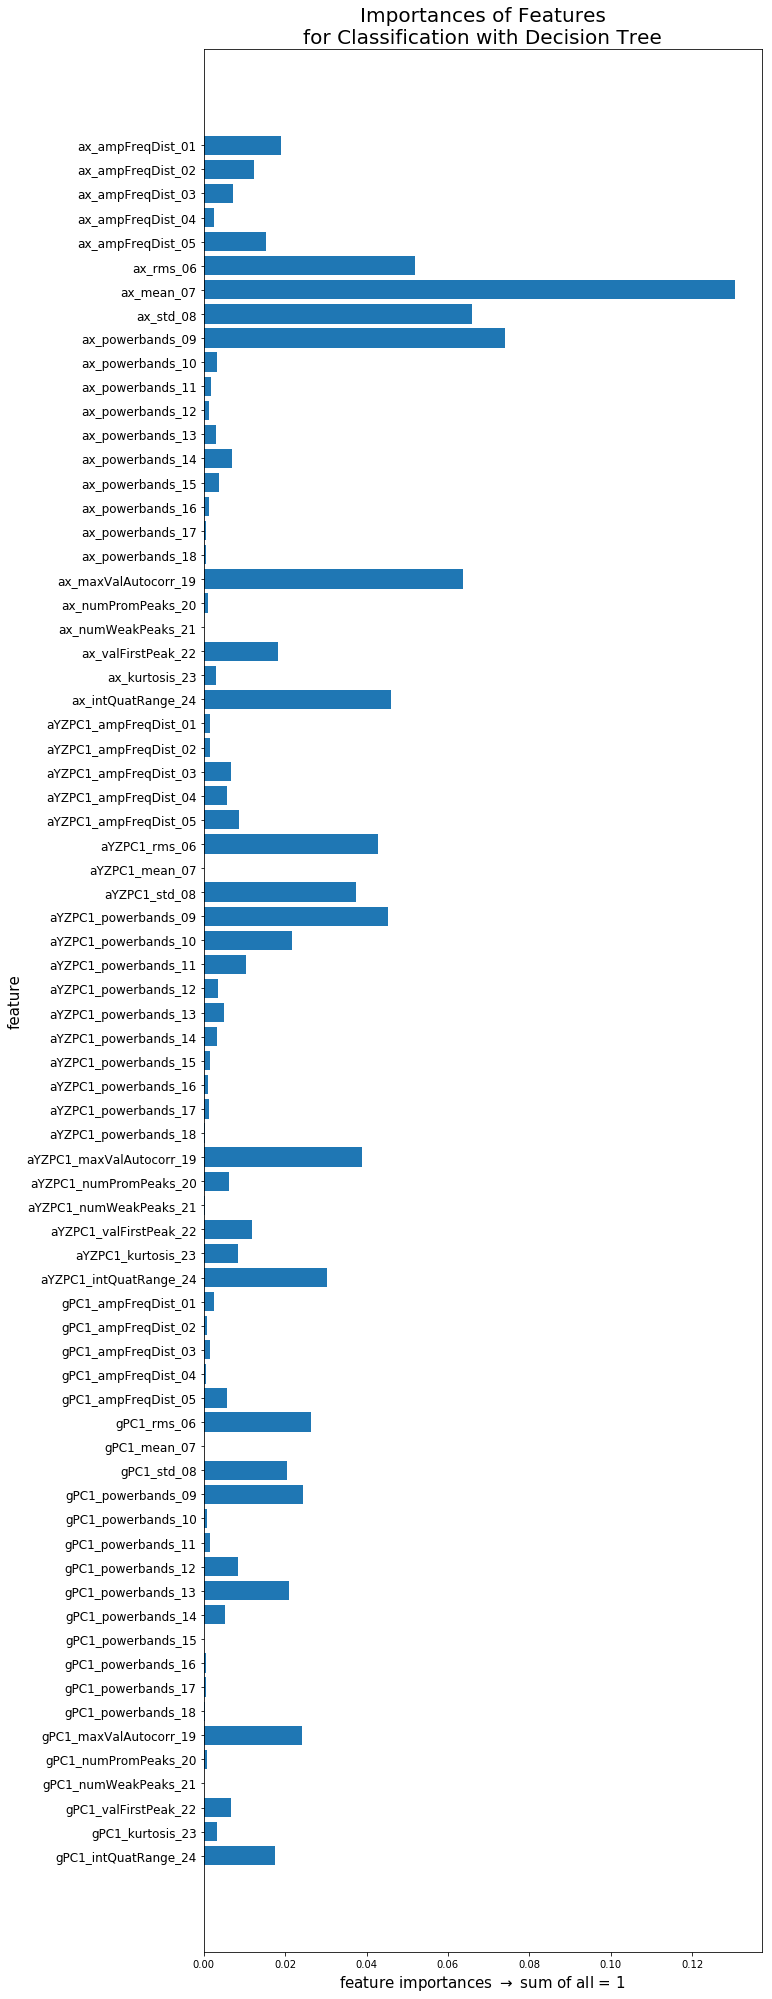

In [12]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject01', plot_feat_imp=True)

### Evaluation of Subject 2:

Evaluation of subject02:

Number of features: 		72
Number of training samples: 	32195
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	28	13	27	0	0	0	0	9	0	0	| True	 36.36%
RF 10  |	131	9	0	0	0	0	0	4	6	0	| True	 87.33%
RF 15  |	199	0	0	0	0	0	0	6	1	0	| True	 96.60%
RO 05  |	23	38	4	0	0	0	0	7	0	0	| True	 52.78%
RO 10  |	88	25	10	0	0	0	0	15	0	0	| False	 18.12%
RO 15  |	170	23	4	0	0	0	0	1	9	0	| False	 11.11%
RS 05  |	17	17	18	0	0	0	0	1	13	0	| True	 27.27%
RS 10  |	53	58	32	0	8	0	0	1	0	0	| False	 21.05%
RS 15  |	123	70	7	0	0	0	0	6	7	0	| False	  3.29%
LR 05  |	0	0	0	62	0	1	0	0	3	2	| True	 91.18%
LR 10  |	0	0	0	138	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	207	0	0	0	0	0	0	| True	100.00%
BC 05  |	4	1	0	0	56	0	0	2	6	0	| True	 81.16%
BC 10  |	1	0	0	0	138	0	1	5	0	0	| True	 95.17%
BC 15  |	0	0	0	0	208	0	0	0	4	0	| True	 98.11%
TC 05  |	0	0	0	

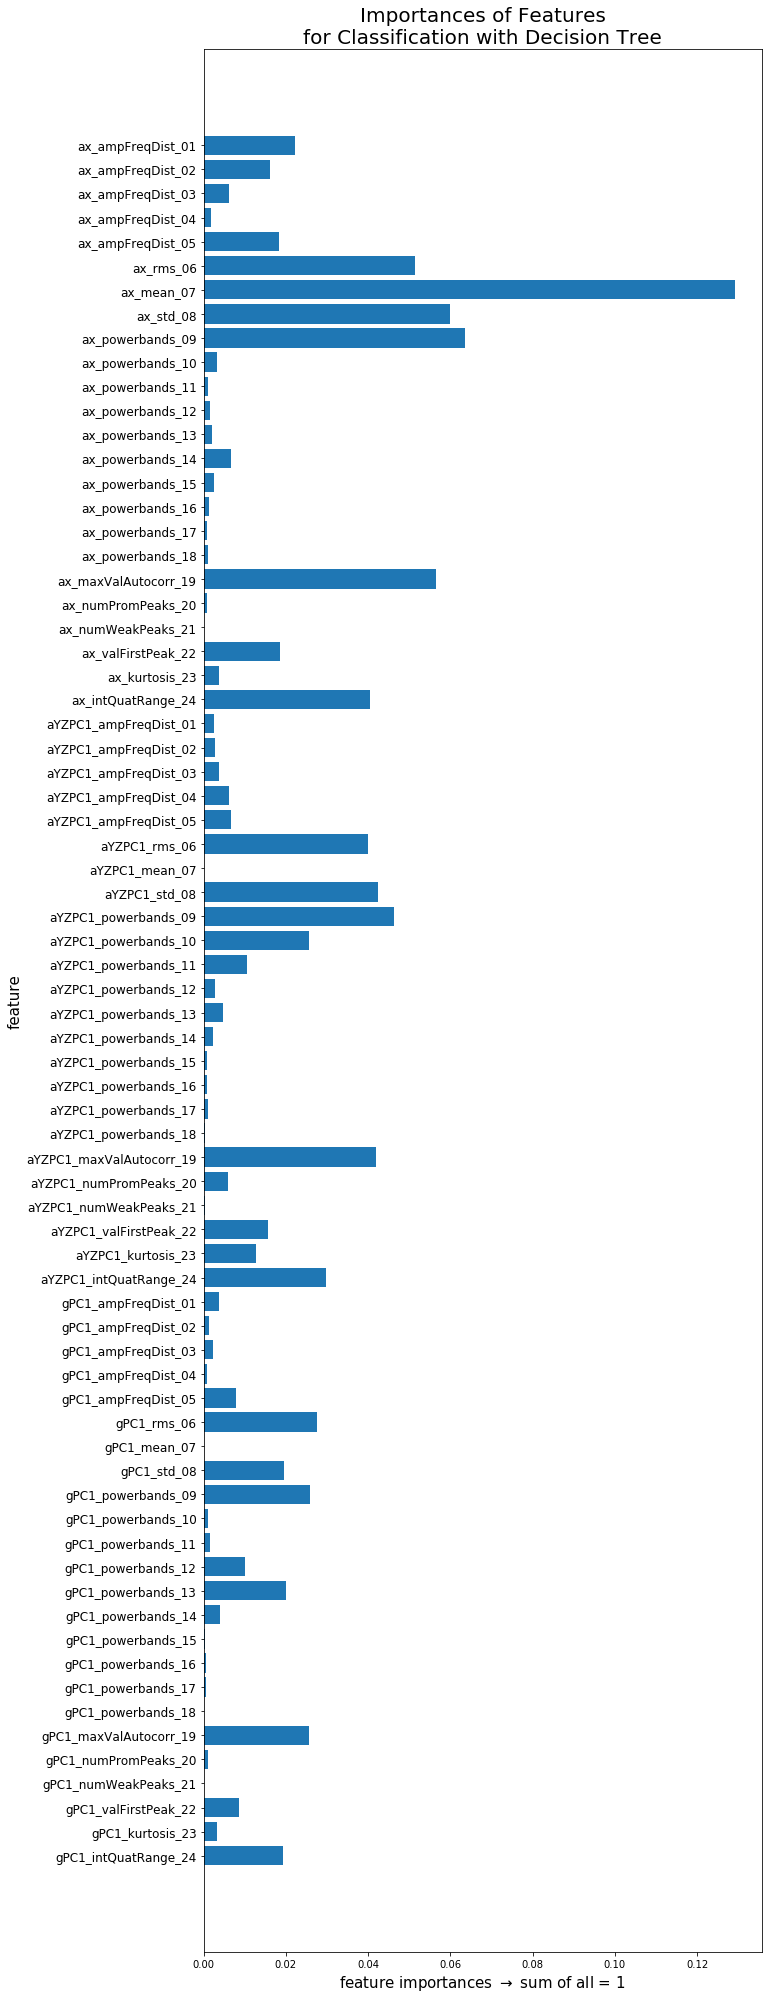

In [13]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject02', plot_feat_imp=True)

### Evaluation of Subject 3:

In [14]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject03')

Evaluation of subject03:

Number of features: 		72
Number of training samples: 	31278
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	46	0	20	0	0	0	0	0	29	0	| True	 48.42%
RF 10  |	162	0	4	0	0	0	0	0	39	0	| True	 79.02%
RF 15  |	173	0	82	0	0	0	0	0	31	0	| True	 60.49%
RO 05  |	12	75	0	0	0	0	4	0	0	0	| True	 82.42%
RO 10  |	8	163	3	0	0	0	5	0	0	0	| True	 91.06%
RO 15  |	26	180	53	0	0	0	2	0	0	0	| True	 68.97%
RS 05  |	57	4	24	0	0	0	1	0	11	0	| False	 24.74%
RS 10  |	63	24	90	0	0	0	0	0	3	0	| True	 50.00%
RS 15  |	51	71	130	0	0	0	1	0	8	0	| True	 49.81%
LR 05  |	0	0	0	65	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	0	0	120	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	183	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	21	0	0	68	0	3	0	0	0	| True	 73.91%
BC 10  |	2	73	5	0	101	0	0	0	0	0	| True	 55.80%
BC 15  |	0	42	0	0	248	0	1	0	0	0	| True	 85.22%
TC 05  |	0	0	

### Evaluation of Subject 4:

In [15]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject04')

Evaluation of subject04:

Number of features: 		72
Number of training samples: 	31228
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	3	61	22	0	0	0	0	0	0	0	| False	  3.49%
RF 10  |	3	121	43	0	0	0	0	1	0	0	| False	  1.79%
RF 15  |	2	204	56	0	0	0	0	0	0	0	| False	  0.76%
RO 05  |	0	81	5	0	0	0	0	0	0	0	| True	 94.19%
RO 10  |	1	174	7	0	0	0	0	2	0	0	| True	 94.57%
RO 15  |	0	237	17	0	0	0	0	0	0	0	| True	 93.31%
RS 05  |	2	59	11	0	0	4	0	5	0	0	| False	 13.58%
RS 10  |	3	135	18	0	0	8	0	0	0	0	| False	 10.98%
RS 15  |	6	210	28	0	0	6	0	0	0	1	| False	 11.16%
LR 05  |	0	0	0	78	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	0	0	150	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	240	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	0	0	0	76	5	0	0	0	2	| True	 91.57%
BC 10  |	0	0	0	0	125	32	0	0	0	9	| True	 75.30%
BC 15  |	0	0	0	0	186	34	0	0	0	11	| True	 80.52%
TC 05  |	0	0	0

### Evaluation of Subject 5:

In [16]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject05')

Evaluation of subject05:

Number of features: 		72
Number of training samples: 	32554
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	11	0	55	0	0	0	0	9	0	0	| False	 14.67%
RF 10  |	57	1	97	0	0	0	0	6	4	0	| False	 34.55%
RF 15  |	20	8	172	0	0	0	0	19	2	0	| False	  9.05%
RO 05  |	4	8	50	0	0	0	0	0	4	0	| False	 12.12%
RO 10  |	3	85	46	0	0	0	0	1	4	3	| True	 59.86%
RO 15  |	4	158	24	0	3	0	0	3	4	3	| True	 79.40%
RS 05  |	22	0	23	0	0	0	0	15	13	0	| True	 31.51%
RS 10  |	8	0	115	0	0	0	0	14	10	0	| True	 78.23%
RS 15  |	36	1	137	0	0	0	0	40	6	0	| True	 62.27%
LR 05  |	0	0	0	54	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	0	0	118	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	180	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	0	0	0	58	0	0	0	0	4	| True	 93.55%
BC 10  |	0	0	0	0	146	0	0	0	2	2	| True	 97.33%
BC 15  |	0	0	0	0	210	0	0	0	0	0	| True	100.00%
TC 05  |	0	0	0	

### Evaluation of Subject 6:

In [17]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject06')

Evaluation of subject06:

Number of features: 		72
Number of training samples: 	33238
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	38	0	2	0	15	0	0	0	0	0	| True	 69.09%
RF 10  |	89	7	24	0	0	0	0	0	0	0	| True	 74.17%
RF 15  |	169	0	3	0	5	0	0	0	0	0	| True	 95.48%
RO 05  |	2	35	15	0	0	0	0	0	0	0	| True	 67.31%
RO 10  |	25	59	29	0	0	0	0	0	0	0	| True	 52.21%
RO 15  |	45	56	69	0	0	0	0	0	0	0	| False	 32.94%
RS 05  |	8	0	39	0	0	0	0	8	0	0	| True	 70.91%
RS 10  |	35	0	80	0	0	0	0	7	0	0	| True	 65.57%
RS 15  |	126	0	17	0	0	0	0	15	1	0	| False	 10.69%
LR 05  |	0	0	0	44	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	0	0	95	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	147	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	0	0	0	2	12	0	0	0	32	| False	  4.35%
BC 10  |	0	0	0	0	46	0	0	0	2	49	| False	 47.42%
BC 15  |	0	0	0	0	37	0	0	0	1	106	| False	 25.69%
TC 05  |	0	0	0	0	0

### Evaluation of Subject 7:

In [18]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject07')

Evaluation of subject07:

Number of features: 		72
Number of training samples: 	33024
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	45	2	0	0	0	0	0	14	0	0	| True	 73.77%
RF 10  |	84	1	20	0	0	0	0	12	2	0	| True	 70.59%
RF 15  |	65	22	88	0	0	0	0	5	7	1	| False	 34.57%
RO 05  |	0	3	46	0	0	0	0	5	8	0	| False	  4.84%
RO 10  |	21	102	0	0	2	0	0	1	3	2	| True	 77.86%
RO 15  |	13	169	0	0	0	0	0	0	2	4	| True	 89.89%
RS 05  |	1	24	14	0	0	2	0	0	9	6	| False	 25.00%
RS 10  |	12	81	8	0	0	1	0	1	4	12	| False	  6.72%
RS 15  |	6	158	5	0	0	1	0	0	7	8	| False	  2.70%
LR 05  |	0	0	0	38	0	0	0	2	0	7	| True	 80.85%
LR 10  |	0	0	0	101	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	141	0	0	0	6	1	0	| True	 95.27%
BC 05  |	36	5	0	0	0	0	0	8	0	0	| False	  0.00%
BC 10  |	16	55	3	0	20	1	0	1	13	0	| False	 18.35%
BC 15  |	73	83	5	0	0	0	0	13	0	0	| False	  0.00%
TC 05  |	0	0

### Evaluation of Subject 8:

In [19]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject08')

Evaluation of subject08:

Number of features: 		72
Number of training samples: 	33049
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	48	0	6	0	0	0	0	4	0	0	| True	 82.76%
RF 10  |	115	0	5	0	1	0	0	5	0	0	| True	 91.27%
RF 15  |	156	14	4	0	0	0	0	5	0	0	| True	 87.15%
RO 05  |	1	46	0	0	0	0	0	10	0	0	| True	 80.70%
RO 10  |	13	98	1	0	0	0	0	10	0	2	| True	 79.03%
RO 15  |	10	154	2	0	1	0	0	7	0	2	| True	 87.50%
RS 05  |	2	0	42	0	0	0	0	0	8	4	| True	 75.00%
RS 10  |	31	11	61	0	0	0	0	2	4	8	| True	 52.14%
RS 15  |	43	8	117	0	0	0	0	1	3	10	| True	 64.29%
LR 05  |	0	0	0	48	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	2	0	90	0	0	0	6	0	0	| True	 91.84%
LR 15  |	0	0	0	153	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	19	5	0	25	0	0	0	0	1	| True	 50.00%
BC 10  |	4	15	0	0	81	0	0	0	0	0	| True	 81.00%
BC 15  |	4	10	1	0	149	0	0	0	0	6	| True	 87.65%
TC 05  |	0	0	0	0	0	63	

### Evaluation of Subject 9:

In [20]:
evaluate_test_subject(feature_data, ML_model, test_subject='subject09')

Evaluation of subject09:

Number of features: 		72
Number of training samples: 	33107
Number of blocks to classify:	30

Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
-------|----------------------------------------------------------------------------------------|--------------
RF 05  |	49	1	5	0	0	0	0	0	0	0	| True	 89.09%
RF 10  |	48	11	52	0	0	0	0	17	0	0	| False	 37.50%
RF 15  |	70	22	78	0	4	0	0	5	0	0	| False	 39.11%
RO 05  |	4	47	3	0	0	0	0	2	0	6	| True	 75.81%
RO 10  |	11	100	4	0	2	0	0	0	0	0	| True	 85.47%
RO 15  |	23	131	15	0	1	0	0	3	0	6	| True	 73.18%
RS 05  |	9	29	9	0	0	0	0	2	0	9	| False	 15.52%
RS 10  |	72	18	5	0	0	0	0	4	9	3	| False	  4.50%
RS 15  |	46	90	25	0	2	0	0	0	1	10	| False	 14.37%
LR 05  |	0	0	0	48	0	0	0	0	0	0	| True	100.00%
LR 10  |	0	0	0	109	0	0	0	0	0	0	| True	100.00%
LR 15  |	0	0	0	158	0	0	0	0	0	0	| True	100.00%
BC 05  |	0	0	0	0	40	0	0	0	0	11	| True	 78.43%
BC 10  |	0	0	0	0	107	0	0	0	0	6	| True	 94.69%
BC 15  |	0	0	0	0	165	0	0	0	0	4	| True	 97.63%
TC 05  |	0	0	0	0

In [ ]:
RF 05  &	15	&1	&0	  &0	  &41	&0	&0	&0	&2	&5	& F & 23.44\,\%\\
RF 10  &	48	&34	&1	  &0	  &57	&0	&0	&0	&1	&1	& F & 33.80\,\%\\
RF 15  &	77	&2	&0	  &0	  &111	&0	&0	&0	&3	&0	& F & 39.90\,\%\\
RO 05  &	4	&45	&0	  &0	  &16	&0	&0	&0	&6	&0	& T & 63.38\,\%\\
RO 10  &	1	&116&1	  &0	  &11	&0	&0	&1	&5	&3	& T & 84.06\,\%\\
RO 15  &	5	&172&2	  &0	  &9	&0	&0	&0	&6	&0	& T & 88.66\,\%\\
RS 05  &	28	&0	&36	  &0	  &0	&0	&0	&0	&8	&0	& T & 50.00\,\%\\
RS 10  &	9	&11	&111  &0	  &0	&0	&0	&9	&0	&0	& T & 79.29\,\%\\
RS 15  &	99	&9	&122  &0	  &2	&0	&0	&0	&0	&0	& T & 52.59\,\%\\
LR 05  &	0	&0	&0	  &63	  &0	&4	&0	&0	&0	&0	& T & 94.03\,\%\\
LR 10  &	0	&0	&0	  &127    &0	&0	&0	&0	&0	&0	& T &100.00\,\%\\
LR 15  &	0	&0	&0	  &192    &0	&4	&0	&0	&1	&0	& T & 97.46\,\%\\
BC 05  &	0	&0	&0	  &0	  &59	&0	&0	&0	&2	&2	& T & 93.65\,\%\\
BC 10  &	0	&0	&0	  &0	  &146	&0	&0	&0	&1	&3	& T & 97.33\,\%\\
BC 15  &	1	&0	&0	  &0	  &185	&0	&0	&0	&4	&3	& T & 95.85\,\%\\
TC 05  &	0	&0	&0	  &0	  &0	&54	&0	&0	&0	&19	& T & 73.97\,\%\\
TC 10  &	0	&0	&0	  &0	  &0	&115&0	&0	&0	&13	& T & 89.84\,\%\\
TC 15  &	0	&0	&0	  &0	  &0	&208&0	&0	&0	&0	& T &100.00\,\%\\
MP 05  &	0	&0	&0	  &0	  &0	&0	&65	&0	&0	&3	& T & 95.59\,\%\\
MP 10  &	0	&0	&0	  &0	  &0	&2	&155&0	&0	&2	& T & 97.48\,\%\\
MP 15  &	0	&0	&0	  &0	  &0	&0	&248&0	&0	&7	& T & 97.25\,\%\\
SA 05  &	4	&0	&0	  &0	  &0	&0	&0	&66	&4	&6	& T & 82.50\,\%\\
SA 10  &	1	&0	&1	  &0	  &0	&0	&0	&138&4	&0	& T & 95.83\,\%\\
SA 15  &	6	&1	&4	  &0	  &0	&0	&0	&230&10	&0	& T & 91.63\,\%\\
P1 05  &	0	&0	&0	  &0	  &0	&0	&0	&0	&75	&0	& T &100.00\,\%\\
P1 10  &	0	&0	&0	  &0	  &1	&0	&0	&0	&154&1	& T & 98.72\,\%\\
P1 15  &	0	&0	&0	  &0	  &0	&0	&0	&0	&211&0	& T &100.00\,\%\\
P2 05  &	0	&0	&0	  &0	  &0	&9	&0	&0	&0	&59	& T & 86.76\,\%\\
P2 10  &	0	&0	&0	  &0	  &0	&0	&0	&0	&0	&132& T &100.00\,\%\\
P2 15  &	0	&0	&0	  &0	  &0	&0	&0	&0	&0	&192& T &100.00\,\%\\

In [ ]:
Evaluation of subject01:
Number of features: 		72
Number of training samples: 	32247
Number of blocks to classify:	30
Total accuracy: 90.00%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RF 05  	&15	&1	&0	&0	&41	&0	&0	&0	&2	&5	& BC \\
RF 10  	&48	&34	&1	&0	&57	&0	&0	&0	&1	&1	& BC \\
RF 15  	&77	&2	&0	&0	&111&0	&0	&0	&3	&0	& BC \\


Evaluation of subject02:
Total accuracy: 86.67%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RO 10  	&88	    &25	&10	&0	&0	&0	&0	&15	&0	&0	& RF \\
RO 15  	&170	&23	&4	&0	&0	&0	&0	&1	&9	&0	& RF \\
RS 10  	&53	    &58	&32	&0	&8	&0	&0	&1	&0	&0	& RO \\
RS 15  	&123	&70	&7	&0	&0	&0	&0	&6	&7	&0	& RF \\


Evaluation of subject03:
Total accuracy: 80.00%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RS 05  &	57	&4	&24	&0	&0	&0	&1	&0	&11	&0	& RF \\
TC 05  &	0	&0	&0	&0	&0	&3	&0	&0	&0	&97	& P2 \\
TC 10  &	0	&0	&0	&1	&0	&2	&19	&0	&122&37	& P1 \\
TC 15  &	0	&0	&0	&0	&0	&73	&16	&0	&32	&196& P2 \\
P2 05  &	0	&2	&42	&0	&20	&0	&0	&19	&0	&0	& RS \\
P2 10  &	0	&0	&88	&0	&56	&0	&0	&45	&0	&0	& RS \\


Evaluation of subject04:
Total accuracy: 70.00%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RF 05  &	3	&61	    &22	&0	&0	&  0	&0	&0	&0	&0	& RO \\
RF 10  &	3	&121	&43	&0	&0	&  0	&0	&1	&0	&0	& RO \\
RF 15  &	2	&204	&56	&0	&0	&  0	&0	&0	&0	&0	& RO \\
RS 05  &	2	&59	    &11	&0	&0	&  4	&0	&5	&0	&0	& RO \\
RS 10  &	3	&135	&18	&0	&0	&  8	&0	&0	&0	&0	& RO \\
RS 15  &	6	&210	&28	&0	&0	&  6	&0	&0	&0	&1	& RO \\
P2 05  &	0	&0	    &0	&0	&0	&  109	&5	&0	&0	&0	& SA \\
P2 10  &	0	&0	    &0	&0	&0	&  230	&4	&0	&0	&0	& SA \\
P2 15  &	0	&0	    &0	&0	&0	&  335	&4	&0	&0	&1	& SA \\
 \\

Evaluation of subject05:
Total accuracy: 80.00%
Block  &	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RF 05  &	11	&0	& 55	&0	&0	&0	&  0	&9	&0	&0	& RS \\
RF 10  &	57	&1	& 97	&0	&0	&0	&  0	&6	&4	&0	& RS \\
RF 15  &	20	&8	& 172	&0	&0	&0	&  0	&19	&2	&0	& RS \\
RO 05  &	4	&8	& 50	&0	&0	&0	&  0	&0	&4	&0	& RS \\
TC 15  &	0	&0	& 0 	&0	&20	&48	&  0	&0	&0	&133& P2 \\
P1 15  &	0	&0	& 0 	&0	&0	&0	&  0	&108&61	&0	& SA \\


Evaluation of subject06:
Total accuracy: 83.33%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RO 15  &	45	&56	&69	&0	&0	&0	&0	&0	&0	&0	& RS \\
RS 15  &	126	&0	&17	&0	&0	&0	&0	&15	&1	&0	& RF \\
BC 05  &	0	&0	&0	&0	&2	&12	&0	&0	&0	&32	& P2 \\
BC 10  &	0	&0	&0	&0	&46	&0	&0	&0	&2	&49	& P2 \\
BC 15  &	0	&0	&0	&0	&37	&0	&0	&0	&1	&106& P2 \\


Evaluation of subject07:
Total accuracy: 73.33%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RF 15  &	65	&  22	&88	&0	&0	&0	&0	&5	&7	&1	& RS \\
RO 05  &	0	&  3	&46	&0	&0	&0	&0	&5	&8	&0	& RS \\
RS 05  &	1	&  24	&14	&0	&0	&2	&0	&0	&9	&6	& RO \\
RS 10  &	12	&  81	&8	&0	&0	&1	&0	&1	&4	&12	& RO \\
RS 15  &	6	&  158	&5	&0	&0	&1	&0	&0	&7	&8	& RO \\
BC 05  &	36	&  5	&0	&0	&0	&0	&0	&8	&0	&0	& RF \\
BC 10  &	16	&  55	&3	&0	&20	&1	&0	&1	&13	&0	& RO \\
BC 15  &	73	&  83	&5	&0	&0	&0	&0	&13	&0	&0	& RO \\


Evaluation of subject08:
Total accuracy: 96.67%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
P1 05  &	28	&0	&0	&0	&0	&0	&0	&17	&13	&0	& RF \\


Evaluation of subject09:
Total accuracy: 83.33%
Block  |	RF	RO	RS	LR	BC	TC	MP	SA	P1	P2	|  Prediction
RF 10  &	48	&11	&52	&0	&0	&0	&0	&17	&0	&0	& RS \\
RF 15  &	70	&22	&78	&0	&4	&0	&0	&5	&0	&0	& RS \\
RS 05  &	9	&29	&9	&0	&0	&0	&0	&2	&0	&9	& RO \\
RS 10  &	72	&18	&5	&0	&0	&0	&0	&4	&9	&3	& RF \\
RS 15  &	46	&90	&25	&0	&2	&0	&0	&0	&1	&10	& RO \\
